In [4]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from rwr_functions import *
from constants import *
import json
from sknetwork.data import from_edge_list

In [5]:
with open("processed_data/networks/networks_n_edges.json", "r") as f:
    networks_n_edges = json.load(f)
with open("processed_data/networks/networks_n_nodes.json", "r") as f:
    networks_n_nodes = json.load(f)
    
networks_n_nodes

{'BioPlex3': 8364,
 'HumanNet': 18593,
 'PCNet': 20517,
 'ProteomeHD': 2718,
 'STRING': 17079}

In [19]:
results = []
# metrics = 0

    
for disease in tqdm(DISEASES):
# for disease in tqdm(["asthma"]):
    
    pegasus_data = load_pegasus_results(disease)
    gene_seeds_ncbi, ncbi_targets = load_seeds_and_targets(disease)
    
    ncbi_targets = list(set(ncbi_targets))

    for alpha in tqdm(ALPHAS):
        genes_ranks = {}
        genes_scores = {}
        for netname in NETWORKS:
            # graph = load_graph(netname)
            graph = load_graph_nx(netname)
            # pagerank_seeds = init_rwr_scores(graph, pegasus_data)
            pagerank_seeds = init_rwr_scores_nx(graph, pegasus_data)
            # rwr_scores = perform_rwr(alpha, graph, pagerank_seeds)
            rwr_scores = perform_rwr_nx(alpha, graph, pagerank_seeds)
            # rwr_results = process_rwr_results(rwr_scores, graph, pegasus_data, pagerank_seeds) 
            rwr_results = process_rwr_results_nx(rwr_scores, graph, pegasus_data, pagerank_seeds) 
            rank = 0
            
            # max_score = np.max(list(pagerank_seeds.values()))
            score_norm = np.sum(list(pagerank_seeds.values())) * 0.01
            n_nodes = networks_n_nodes[netname]
            for i, row in rwr_results.iterrows():
                gn = str(row["Gene NCBI ID"])
                rank += 1
                if gn not in genes_ranks:
                    genes_ranks[gn] = [rank/n_nodes]
                else:
                    genes_ranks[gn].append(rank/n_nodes)


                if gn not in genes_scores:
                    genes_scores[gn] = [row["Final Score"]/score_norm]
                else:
                    genes_scores[gn].append(row["Final Score"]/score_norm)
                    

        genes_ranks_df = []
        for k, v in genes_ranks.items():
            if len(v)<2:
                continue
            genes_ranks_df.append({"Gene NCBI ID": k, "Avg. Rank": np.mean(v), "Method": "Score", "Disease": disease, "Alpha": alpha})
        genes_ranks_df = pd.DataFrame(genes_ranks_df).sort_values(by="Avg. Rank", ascending=True)
        # genes_ranks_df.to_csv("outputs/AVG_RWRs_gene_scores/{}_avg_rank_alpha{}.csv".format(disease, alpha), index=False)

        genes_scores_df = []
        for k, v in genes_scores.items():
            if len(v)<2:
                continue
            genes_scores_df.append({"Gene NCBI ID": k, "Avg. Score": np.mean(v), "Method": "Score", "Disease": disease, "Alpha": alpha})
        genes_scores_df = pd.DataFrame(genes_scores_df).sort_values(by="Avg. Score", ascending=False)
        # genes_scores_df.to_csv("outputs/AVG_RWRs_gene_scores/{}_avg_score_alpha{}.csv".format(disease, alpha), index=False)
        for K in Ks:
            metrics = calculate_metrics(genes_ranks_df, K, gene_seeds_ncbi, ncbi_targets, "Multilayer", alpha, disease, scoring="Avg. Rank")
            results.append(metrics)
            metrics = calculate_metrics(genes_scores_df, K, gene_seeds_ncbi, ncbi_targets, "Multilayer", alpha, disease, scoring="Avg. Score")
            results.append(metrics)

            
      
                
results = pd.concat(results)
results

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Loading BioPlex3 graph
Loading HumanNet graph
Loading PCNet graph
Loading ProteomeHD graph
Loading STRING graph
Loading BioPlex3 graph
Loading HumanNet graph
Loading PCNet graph
Loading ProteomeHD graph
Loading STRING graph
Loading BioPlex3 graph
Loading HumanNet graph
Loading PCNet graph
Loading ProteomeHD graph
Loading STRING graph
Loading BioPlex3 graph
Loading HumanNet graph
Loading PCNet graph
Loading ProteomeHD graph
Loading STRING graph
Loading BioPlex3 graph
Loading HumanNet graph
Loading PCNet graph
Loading ProteomeHD graph
Loading STRING graph
Loading BioPlex3 graph
Loading HumanNet graph
Loading PCNet graph
Loading ProteomeHD graph
Loading STRING graph
Loading BioPlex3 graph
Loading HumanNet graph
Loading PCNet graph
Loading ProteomeHD graph
Loading STRING graph
Loading BioPlex3 graph
Loading HumanNet graph
Loading PCNet graph
Loading ProteomeHD graph
Loading STRING graph
Loading BioPlex3 graph
Loading HumanNet graph
Loading PCNet graph
Loading ProteomeHD graph
Loading STRIN

  0%|          | 0/100 [00:00<?, ?it/s]

Loading BioPlex3 graph
Loading HumanNet graph
Loading PCNet graph
Loading ProteomeHD graph
Loading STRING graph
Loading BioPlex3 graph
Loading HumanNet graph
Loading PCNet graph
Loading ProteomeHD graph
Loading STRING graph
Loading BioPlex3 graph
Loading HumanNet graph
Loading PCNet graph
Loading ProteomeHD graph
Loading STRING graph
Loading BioPlex3 graph
Loading HumanNet graph
Loading PCNet graph
Loading ProteomeHD graph
Loading STRING graph
Loading BioPlex3 graph
Loading HumanNet graph
Loading PCNet graph
Loading ProteomeHD graph
Loading STRING graph
Loading BioPlex3 graph
Loading HumanNet graph
Loading PCNet graph
Loading ProteomeHD graph
Loading STRING graph
Loading BioPlex3 graph
Loading HumanNet graph
Loading PCNet graph
Loading ProteomeHD graph
Loading STRING graph
Loading BioPlex3 graph
Loading HumanNet graph
Loading PCNet graph
Loading ProteomeHD graph
Loading STRING graph
Loading BioPlex3 graph
Loading HumanNet graph
Loading PCNet graph
Loading ProteomeHD graph
Loading STRIN

  0%|          | 0/100 [00:00<?, ?it/s]

Loading BioPlex3 graph
Loading HumanNet graph
Loading PCNet graph
Loading ProteomeHD graph
Loading STRING graph
Loading BioPlex3 graph
Loading HumanNet graph
Loading PCNet graph
Loading ProteomeHD graph
Loading STRING graph
Loading BioPlex3 graph
Loading HumanNet graph
Loading PCNet graph
Loading ProteomeHD graph
Loading STRING graph
Loading BioPlex3 graph
Loading HumanNet graph
Loading PCNet graph
Loading ProteomeHD graph
Loading STRING graph
Loading BioPlex3 graph
Loading HumanNet graph
Loading PCNet graph
Loading ProteomeHD graph
Loading STRING graph
Loading BioPlex3 graph
Loading HumanNet graph
Loading PCNet graph
Loading ProteomeHD graph
Loading STRING graph
Loading BioPlex3 graph
Loading HumanNet graph
Loading PCNet graph
Loading ProteomeHD graph
Loading STRING graph
Loading BioPlex3 graph
Loading HumanNet graph
Loading PCNet graph
Loading ProteomeHD graph
Loading STRING graph
Loading BioPlex3 graph
Loading HumanNet graph
Loading PCNet graph
Loading ProteomeHD graph
Loading STRIN

,Network,Alpha,Metric,K,Value,Method,Disease
0,Multilayer,0.0,Average Precision,20,0.585324,Avg. Rank,asthma
0,Multilayer,0.0,Average Precision,20,0.518750,Avg. Score,asthma
0,Multilayer,0.0,Average Precision,50,0.495121,Avg. Rank,asthma
0,Multilayer,0.0,Average Precision,50,0.374169,Avg. Score,asthma
0,Multilayer,0.0,Average Precision,100,0.452186,Avg. Rank,asthma
...,...,...,...,...,...,...,...
0,Multilayer,0.9,Average Precision,20,0.000000,Avg. Score,schizophrenia
0,Multilayer,0.9,Average Precision,50,0.000000,Avg. Rank,schizophrenia
0,Multilayer,0.9,Average Precision,50,0.034483,Avg. Score,schizophrenia
0,Multilayer,0.9,Average Precision,100,0.019463,Avg. Rank,schizophrenia


In [20]:
results.to_csv("outputs/AVG_ensembles_metrics_normalized.csv", index=False)

In [21]:
results


,Network,Alpha,Metric,K,Value,Method,Disease
0,Multilayer,0.0,Average Precision,20,0.585324,Avg. Rank,asthma
0,Multilayer,0.0,Average Precision,20,0.518750,Avg. Score,asthma
0,Multilayer,0.0,Average Precision,50,0.495121,Avg. Rank,asthma
0,Multilayer,0.0,Average Precision,50,0.374169,Avg. Score,asthma
0,Multilayer,0.0,Average Precision,100,0.452186,Avg. Rank,asthma
...,...,...,...,...,...,...,...
0,Multilayer,0.9,Average Precision,20,0.000000,Avg. Score,schizophrenia
0,Multilayer,0.9,Average Precision,50,0.000000,Avg. Rank,schizophrenia
0,Multilayer,0.9,Average Precision,50,0.034483,Avg. Score,schizophrenia
0,Multilayer,0.9,Average Precision,100,0.019463,Avg. Rank,schizophrenia


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

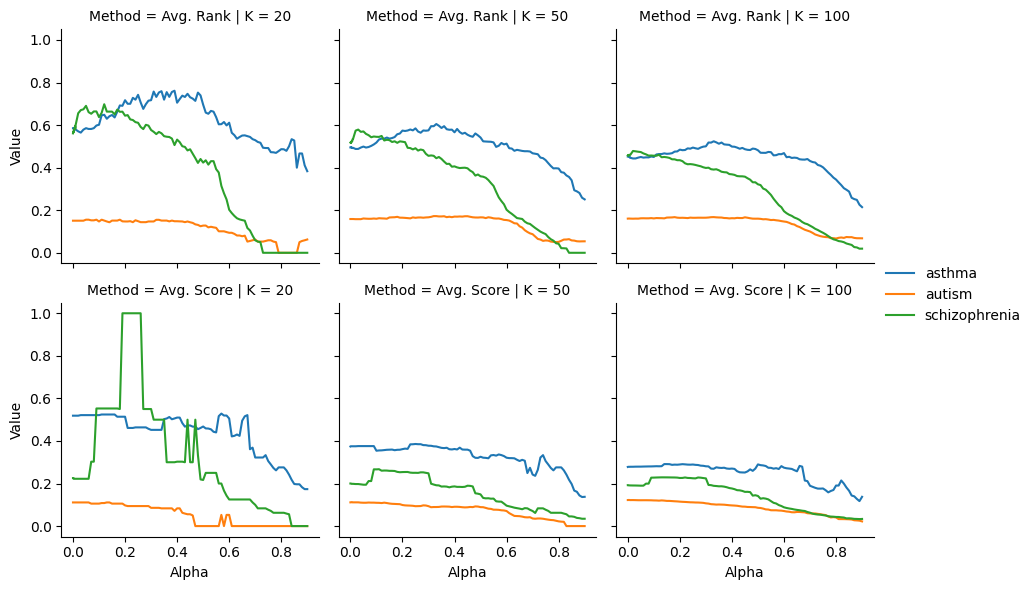

In [23]:

g = sns.FacetGrid(results, col="K", row="Method")
g.map_dataframe(sns.lineplot, "Alpha", "Value", hue="Disease")
g.add_legend()

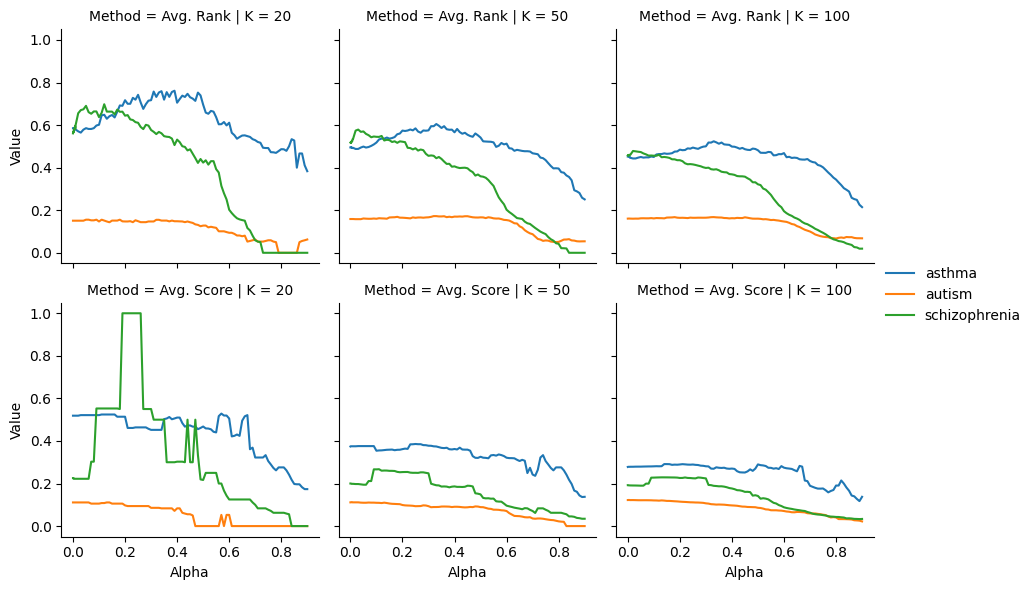

In [24]:

g = sns.FacetGrid(results, col="K", row="Method")
g.map_dataframe(sns.lineplot, "Alpha", "Value", hue="Disease")
g.add_legend()

In [3]:
results = pd.read_csv("outputs/AVG_ensembles_metrics.csv")
results

,Network,Alpha,Metric,K,Value,Method,Disease
0,Multilayer,0.001,Average Precision,20,0.541793,Avg. Rank,asthma
1,Multilayer,0.001,Average Precision,20,0.555556,Avg. Score,asthma
2,Multilayer,0.001,Average Precision,50,0.466160,Avg. Rank,asthma
3,Multilayer,0.001,Average Precision,50,0.357845,Avg. Score,asthma
4,Multilayer,0.001,Average Precision,100,0.424291,Avg. Rank,asthma
...,...,...,...,...,...,...,...
1777,Multilayer,0.900,Average Precision,20,0.000000,Avg. Score,schizophrenia
1778,Multilayer,0.900,Average Precision,50,0.020000,Avg. Rank,schizophrenia
1779,Multilayer,0.900,Average Precision,50,0.000000,Avg. Score,schizophrenia
1780,Multilayer,0.900,Average Precision,100,0.026129,Avg. Rank,schizophrenia
